In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def vid_backround(vid):
    cap = cv2.VideoCapture(vid)
    # we will randomly select 50 frames for the calculating the median
    frame_indices = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=50)
    # we will store the frames in array
    frames = []
    for idx in frame_indices:
        # set the frame id to read that particular frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        frames.append(frame)
    # calculate the median
    median_frame = np.median(frames, axis=0).astype(np.uint8)
    # plt.imshow(median_frame)
    return median_frame
# plt.imshow(vid_backround('E:\\D drive\\CV project\\Video_2022_08_18_20_25_15-2022_08_18_20_31_40.avi'))
bg =  bg = vid_backround('E:\\D drive\\CV project\\Video_2022_08_18_20_25_15-2022_08_18_20_31_40.avi')

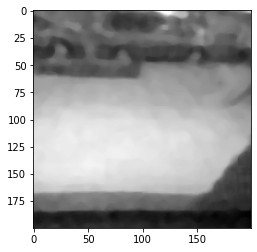

1084.078431372549


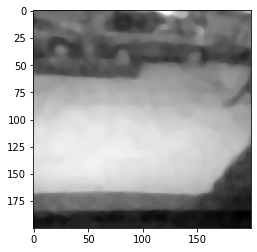

1153.2980392156862


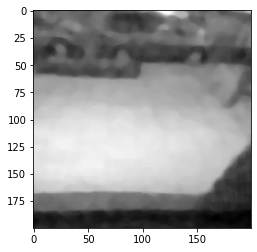

1127.0


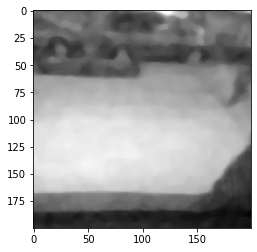

1165.1450980392156


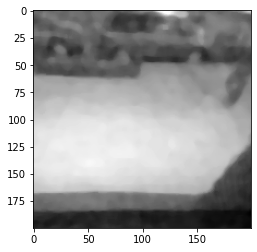

1153.450980392157


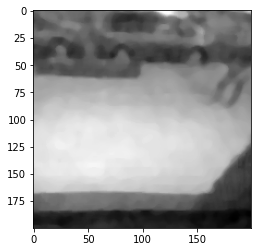

1163.7176470588236


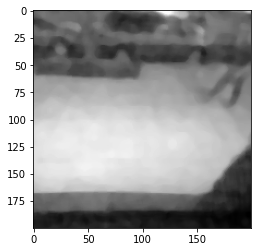

1195.0862745098038


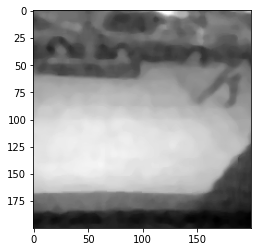

1148.9490196078432


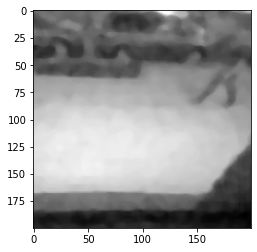

1150.4078431372548


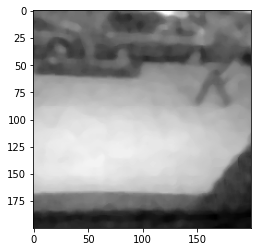

1173.5254901960784


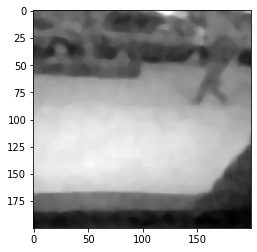

1133.254901960784


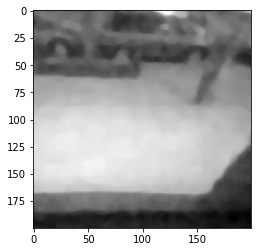

1164.5098039215686


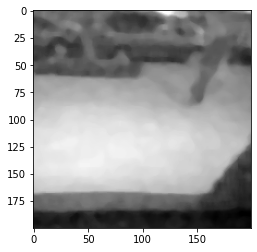

1165.827450980392


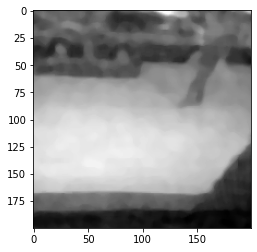

1078.450980392157


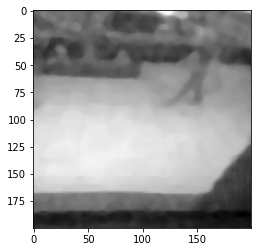

1155.541176470588


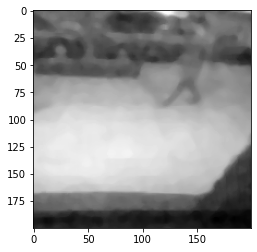

1155.156862745098


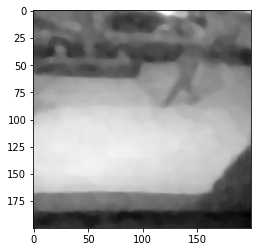

1134.2823529411762


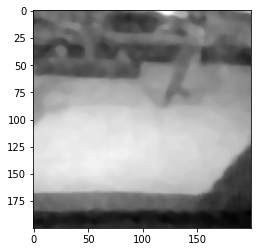

1199.8313725490195


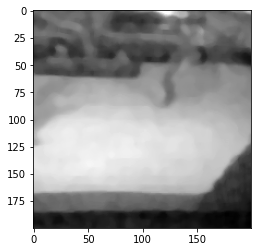

1262.7333333333333


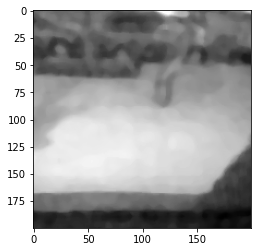

1366.4274509803922


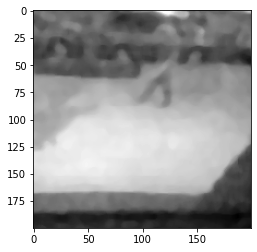

1386.3411764705884


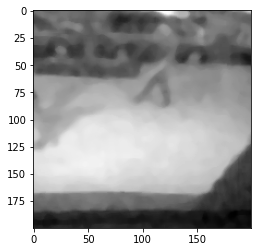

1417.8


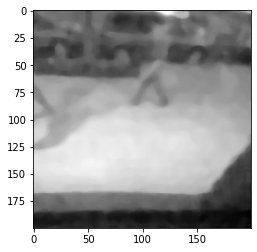

1484.0156862745098


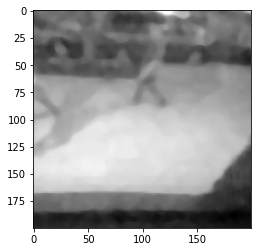

1460.129411764706


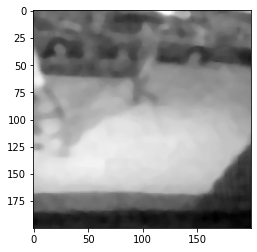

1643.6039215686274


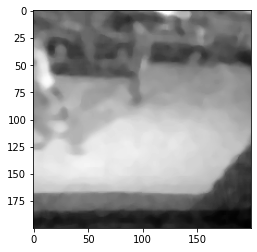

1811.4470588235292


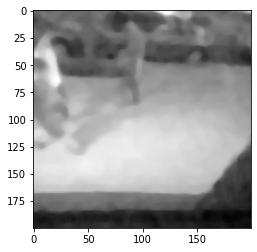

1960.698039215686


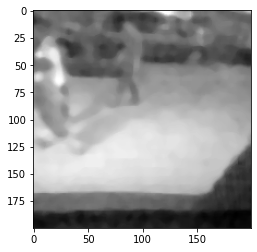

2008.862745098039


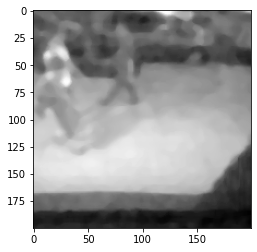

2018.1098039215688


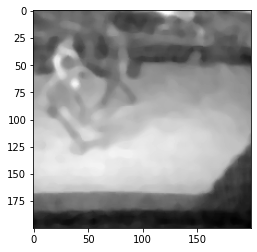

1925.478431372549


In [73]:
# Define your video processing pipeline here


def vid_back_blur(vid , background):
  bg = background
  capture1 = cv2.VideoCapture(vid)
  counter = 0
  center = bg.shape
  w=200
  h=200
  x = center[1]/2 - w/2
  y = center[0]/2 - h/2
  bg= cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
  
  bg = bg[int(y):int(y+h), int(x):int(x+w)]
  bg = bg/255

  kernel1 = np.array([[1, -2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
 
  # hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
  while capture1.isOpened():
    # try:
    ret1, frame1 = capture1.read()
    frame1= cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame1 = cv2.medianBlur(frame1,7)
    frame1=frame1/255
    frame1 = frame1[int(y):int(y+h), int(x):int(x+w)]
    # frame1 = cv2.filter2D(src=frame1, ddepth=-1, kernel=kernel1)
    diff = np.sum(np.abs(frame1-bg))
    counter+=1
    
    if counter>500:
      plt.imshow(frame1,cmap='gray')
      plt.show()
      
      print(diff)
    if counter==530:
      break
    

    # except:
    #     print("Except")
    #     break
  capture1.release()
  # print(max(lst), sum(lst)/len(lst) , min(lst) , np.sum(bg))
vid_back_blur('E:\\D drive\\CV project\\Video_2022_08_18_20_25_15-2022_08_18_20_31_40.avi'  , bg)